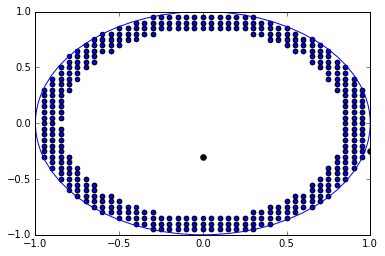

(100, 354, array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]))
[[ 1.          1.          1.         ...,  1.          1.          1.        ]
 [-0.3        -0.25       -0.2        ...,  0.2         0.25        0.3       ]
 [-0.8125     -0.84       -0.8625     ..., -0.8625     -0.84       -0.8125    ]
 ..., 
 [ 0.68352574  0.03046569 -0.05416296 ...,  0.05416296 -0.03046569
  -0.68352574]
 [-0.09032771 -0.17388744 -0.0047027  ..., -0.0047027  -0.17388744
  -0.09032771]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:63: ComplexWarning: Casting complex values to real discards the imaginary part


In [3]:
import numpy as np
import matplotlib.pyplot as plt

epsilon_low = 0.15;
epsilon_high = 0;
rmin = (1 - epsilon_low);
rmax = (1 + epsilon_high);
rmin2 = pow(rmin,2);
rmax2 = rmax*rmax

# auxiliary norms functions
# norm2 = @(x) x(:)'*x(:);
# norm1 = @(x) sum(abs(x(:)))

M = 200; # Number of pairs of poles

# Generate M pairs of poles
d = np.random.uniform(low=0.0, high=1.0, size=M)
r =  np.sqrt(rmin2 + (rmax2-rmin2)*d);
theta =  np.pi *d;

x = r * np.cos(theta);
y = r * np.sin(theta);
rho = x + 1j*y
rho_c = np.conjugate(rho)
P = np.concatenate((rho,rho_c),axis = 0)

delta = 0.05; # grid step



xv = np.arange(-rmax,rmax,delta)
x,y = np.meshgrid(xv,xv,sparse = False);
ppx = np.logical_and(x**2 + y**2 >= rmin2,x**2 + y**2 < rmax2,y > 0)
px = x[ppx]
py = y[ppx]
#realmask = np.logical_and(x**2  >= rmin2 , x**2 <= rmax2 , y == 0)

P = np.concatenate(((px+1j*py),(px-1j*py)),axis = 0) # not including reals yet
M = P.size / 2;

# Plot Poles: Visualize the pool of poles and the unit circle
unitcircle = plt.Circle((0, 0), 1, color='b', fill=False)
#ax = plt.gca()
#ax.cla()
fig, ax = plt.subplots()
ax.scatter(P.real,P.imag)
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
# some data
ax.plot(P, 'o', color='black')
ax.add_artist(unitcircle)
plt.show()

# Generate dictionary
N = 100 # temporal horizon

M = int(M)
W = np.zeros((N,2*M))
print(N,M,W)

for i in range(0,N-1):
    W[i,:] = pow(P,i)
print (W)

# Normalizations
Gamma = np.ones((2*M,1))
for j in range(1,2*M):
    Gamma[j]  = 1 / np.absolute(P[j])
Gamma = Gamma**2

In [4]:
sysOrder = 2;

Trials = M; # Try all pole pairs
Ninit = 10; # Number of trial initial conditions/poles pair
ydata_clean = np.zeros((Trials*Ninit,N))
y = np.zeros((Ninit,N))
k_vec = np.arange(M-1)

for k in range(Trials-1):
    
    
    # Get the subset of poles (always in pairs!)
    # Compute the regressor
    p1 = np.array([P[k_vec[k]], P[k_vec[k] + M]])
    r1 = np.flipud(np.poly(p1))
    
    
    # Generate random initial conditions for Ninit realizations y
    
    y[:,0:sysOrder] = np.random.uniform(low=0.0, high=1.0, size=(Ninit,sysOrder))
    
    
    # Propagate them to the end of the temporal horizon and save in ydata_clean
    
    for i in range (sysOrder,N-1):
        y[:,i] = np.dot(y[:,i-sysOrder:i] , r1[0:2])
    
    
    ydata_clean[k*Ninit: (k+1)*Ninit,:] = y
    print(k,ydata_clean)
    

# Add Noise
nrange = np.absolute(np.amax(ydata_clean) - np.amin(ydata_clean))
level  = 0.01;

# keep the clean data clean
ydata = ydata_clean + level * nrange * np.random.normal(0, 1, size=ydata_clean.shape)
print(ydata,ydata.shape)




(0, array([[  7.01842362e-01,   2.24583897e-01,   8.31328882e-01, ...,
          7.87478460e+11,   1.05556180e+12,   0.00000000e+00],
       [  1.20915584e-01,   5.24642665e-01,   4.34794316e-01, ...,
          6.49844888e+11,   8.71073274e+11,   0.00000000e+00],
       [  6.25498818e-01,   2.65594168e-01,   7.80164078e-01, ...,
          7.71060224e+11,   1.03355426e+12,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]]))
(1, array([[  7.01842362e-01,   2.24583897e-01,   8.31328882e-01, ...,
          7.87478460e+11,   1.05556180e+12,   0.00000000e+00],
       [  1.20915584e-01,   5.24642665e-01,   4.34794316e-01, ...,


In [5]:
from numpy.linalg import inv
from numpy import linalg as LA
def last_lasso_admm(b,A,lambda1,lambda2,G):
    
    if np.all(np.isreal(A)):
        W = A;
        y = b;
        Gamma = G;
    else: 
        W1 = np.concatenate((A.real, -A.imag), axis=0)  
        W2 = np.concatenate((A.imag, A.real), axis=0)
        W = np.concatenate((W1, W2), axis=1)
       
        y = np.concatenate((b.real, b.imag), axis=1)
        Gamma = np.diag(np.concatenate((np.diag(G), np.diag(G)), axis=1))
         

    # Get the size of x

    r = W.shape[1] 
    I = np.eye(r)
    G2 = np.dot(Gamma,Gamma)
    mu = np.zeros((r,1))

    rho = 1e-4 # set rho small
    maxIter = 200
    maxRho = 5
    z = np.random.normal(0,1,size=(r,1)) # init z randomly

    # sth function

    # fast_sthresh = @(x,th) sign(x).*max(abs(x) - th,0);

    
    for n in range(maxIter):
    
        #Solve for x
        C = inv(np.dot(W.T,W) + lambda2*I + rho*G2)
        x = np.dot(C,(np.dot(W.T,y) + np.dot(Gamma,(rho*z - mu))))
    
        
    
        #Solve for z
        th = lambda1/rho
        zz = np.dot(Gamma,x) + mu/rho
        if np.all(np.isreal(zz)):
            z = np.sign(zz)*((np.absolute(zz) - th).clip(0))
        else: 
            zzsign = zz/np.absolute(zz)
            z = zzsign*((np.absolute(zz) - th).clip(0))
    
    
        #Update mu
        mu = mu + rho * (np.dot(Gamma ,x) - z)
    
        # update rho
        rho = np.minimum(maxRho, rho*1.1)
    
        cost = 0.5*LA.norm(y-np.dot(W,x)) + lambda1 * LA.norm(z,ord=1) + lambda2* LA.norm(x)

        if np.all(np.isreal(A)):
             return(x,cost)
        else:
            xout = x[0:r/2] + 1j * x[r/2:x[-1]]
            return(xour,cost)



In [13]:
sys =  int(np.floor(k/Ninit))
print(sys)

0


In [15]:
lambda1 = 0.001
lambda2 = 0
tot_exp = 20 #Trials*Ninit
for k in range(tot_exp):
    # get data (might be noisy
    y = ydata[k,:]
    y = y[:, np.newaxis]   
    
    # which poles
    sys =  int(np.floor(k/Ninit))
    p1 = (P[k_vec[sys]], P[k_vec[sys] + M]);
        
    #Reweighted heuristic using itermax iterations
    reweighted_Gamma = np.diagflat(1/Gamma) # is a diagonal matrix weighting the solution

    for j in range(2):
        OUT = last_lasso_admm(y,W,lambda1,lambda2,reweighted_Gamma)
        x1 = OUT[0]
        cost = OUT[1]
        # update weights and normalize
    
        qq = np.absolute(x1) + 0.001 * np.ones((2*M,1))
    
        GG = np.diag(np.diag(reweighted_Gamma)) / qq
    
        reweighted_Gamma = GG/LA.norm(GG)
    
    
    abs_x1 = np.absolute(x1)
    x1_s = np.flipud(np.sort(abs_x1))
    poles_ind = np.zeros((2*M,1))
    poles_ind[np.where(abs_x1 > x1_s[2])] = 1
    f_sys = np.amin(np.where(poles_ind == 1))
    if f_sys > M:
        f_sys = f_sys - M

    Wr = np.concatenate([W[:,sys][np.newaxis,:],W[:,sys+M][np.newaxis,:]])
    print(Wr.shape)
    coeff = np.linalg.lstsq(Wr.T,y)[0]
    print(y.shape,coeff)
    r_G = np.diag(np.concatenate([Gamma[sys], Gamma[sys+M]]))
    print(r_G.shape)
    opt_cost = 0.5*LA.norm(y-np.dot(Wr.T,coeff)) + lambda1 * LA.norm((r_G * coeff),ord=1) + lambda2* LA.norm(coeff)
    print(opt_cost)
    error_y = LA.norm(np.absolute(y-np.dot(W,x1))) # best possible fitting error
 
    # Found soltion probably has a worse cost ...
        
    Wrr = np.concatenate([W[:,f_sys][np.newaxis,:],W[:,f_sys+M][np.newaxis,:]])
    print(Wrr.shape)
    coeff = np.linalg.lstsq(Wrr.T,y)[0]
    r_G = np.diag(np.concatenate([Gamma[f_sys], Gamma[f_sys+M]]))
    cost = 0.5*LA.norm(y-np.dot(Wrr.T,coeff)) + lambda1 * LA.norm((r_G * coeff),ord=1) + lambda2* LA.norm(coeff)
        
    error_cost = cost - opt_cost
    print(error_y,error_cost)

(2, 100)
((100, 1), array([[ -5.71275857e+32],
       [ -5.71275857e+32]]))
(2, 2)
2.81091232095e+34
(2, 100)
(6.5486348297390263e+33, 0.0)
(2, 100)
((100, 1), array([[  6.47811101e+32],
       [  6.47811101e+32]]))
(2, 2)
3.00427362394e+34
(2, 100)
(8.3058896169409814e+33, 0.0)
(2, 100)
((100, 1), array([[  8.53073759e+32],
       [  8.53073759e+32]]))
(2, 2)
2.81201297769e+34
(2, 100)
(3.0902754271519673e+33, 0.0)
(2, 100)
((100, 1), array([[  3.00730463e+32],
       [  3.00730463e+32]]))
(2, 2)
2.8342176537e+34
(2, 100)
(1.7952777014990687e+34, 0.0)
(2, 100)
((100, 1), array([[  1.26427407e+33],
       [  1.26427407e+33]]))
(2, 2)
2.79688771061e+34
(2, 100)
(1.356420705209302e+34, 0.0)
(2, 100)
((100, 1), array([[ -4.97022424e+32],
       [ -4.97022424e+32]]))
(2, 2)
2.95823761348e+34
(2, 100)
(4.2361108240449996e+34, 0.0)
(2, 100)
((100, 1), array([[  9.80770442e+32],
       [  9.80770442e+32]]))
(2, 2)
3.15331368284e+34
(2, 100)
(1.3624335401179013e+34, 0.0)
(2, 100)
((100, 1), ar

IndexError: index 353 is out of bounds for axis 0 with size 353

In [ ]:
import tensorflow as tf
import numpy as np

W = tf.Variable([.3], tf.float32)
b = tf.Variable([-.3], tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)


init = tf.global_variables_initializer()
sess.run(init)
print(x,y)

print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}))